Ian Soede, Nicolas Salvan

# Control theory and Vicsek Model 

## Introduction

---
In this file, you will find data visualisation of different simulations. 

## Library import

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from IPython.display import Video, display


KeyboardInterrupt: 

In [ ]:
# Import models 
import models.vicsek as vicsek
import visualisation as visualisation
import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

In [ ]:
def import_bib():
    import models.vicsek as vicsek
    import visualisation as visualisation
    import utils
    import animation.Animator2D as Animator2D
    import animation.MatplotlibAnimator as MatplotlibAnimator
import_bib()
    

## 0. Lauching a simulation

In [ ]:
# Initialize the Vicsek model.
radius = 2
L = 50
simulator = vicsek.Vicsek(domainSize=(L, L), radius=radius)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

# Extract the simulation data.
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [ ]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_145,theta_y_145,theta_x_146,theta_y_146,theta_x_147,theta_y_147,theta_x_148,theta_y_148,theta_x_149,theta_y_149
0,0.0,7.972829,14.724262,29.169406,17.377018,43.569787,49.588751,9.297199,19.442432,46.059562,...,-0.338301,-0.941038,0.985721,-0.168388,0.345072,-0.938576,-0.993945,-0.109879,-0.751123,0.660162
1,0.5,8.292432,14.339744,28.989547,16.910488,44.048901,49.731755,9.389869,19.933769,45.560034,...,0.176312,-0.984334,0.971549,-0.236839,0.571737,-0.820437,-0.928981,-0.370128,-0.964696,0.263367
2,1.0,8.639409,13.979734,28.762555,16.464983,44.527604,49.876128,9.384962,20.433745,45.061569,...,0.483761,-0.875200,0.998189,0.060163,0.728101,-0.685470,-0.751486,-0.659749,-0.979542,0.201241
3,1.5,8.904298,13.555666,28.594143,15.994199,44.979899,0.089268,9.300155,20.926500,45.085783,...,0.076617,-0.997061,0.999707,-0.024191,0.839181,-0.543852,-0.563521,-0.826102,-0.950049,-0.312100
4,2.0,9.226047,13.172942,28.496998,15.503727,45.417132,0.331812,9.070264,21.370516,45.563007,...,-0.374880,-0.927074,0.916230,0.400652,0.070516,-0.997511,-0.354914,-0.934899,-0.983840,0.179049


### Animation of the simulation

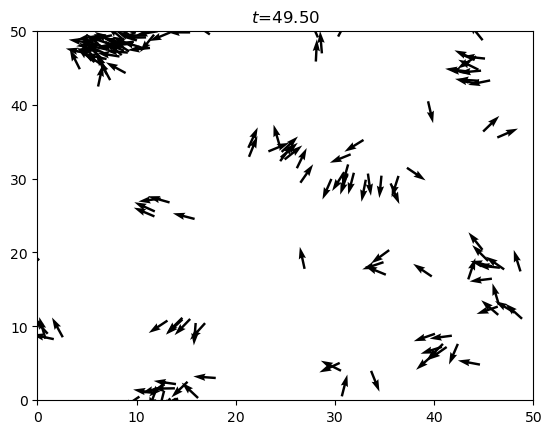

In [ ]:
# Initialize the Matplotanimator and feed the simulation data and domain size.
animator = MatplotlibAnimator.MatplotlibAnimator(simulationData, (50,50))
# Prepare the animator for a 2D representation.
preparedAnimator = animator.prepare(Animator2D.Animator2D())
preparedAnimator.saveAnimation('data/vicsek3.mp4')

In [ ]:
display(Video('data/vicsek3.mp4', embed=False))

## Part 1 : Bird path 

### Bird position over time

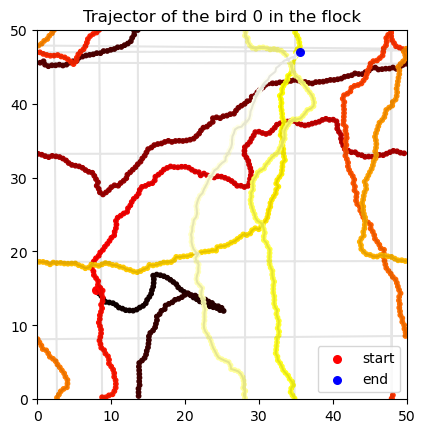

In [ ]:
fig, ax = visualisation.plot_bird_path(df, 0)
# fig.savefig('data/bird_path.png')

### Bird orientation over time 

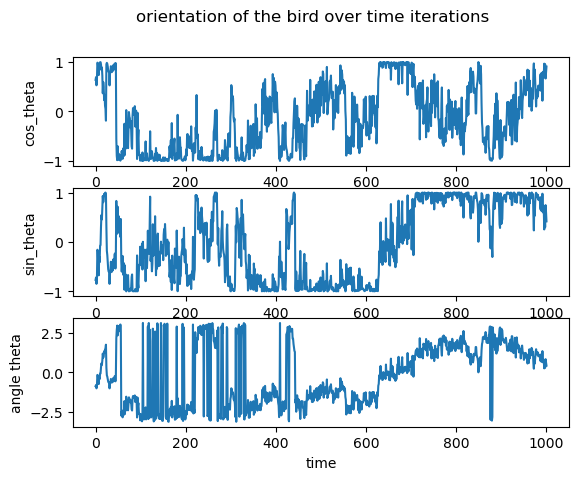

In [ ]:
# TEST
fig, axs = visualisation.plot_bird_orientation(df, 0)
fig.savefig('data/bird_orientation.png')

### Phase portrait of orientation 

In [ ]:
# TODO 

### Highlight a bird in a video, trajectory in the video 

In [ ]:
## TODO but seems useless so I'll do it last

## 2. Controller plots

In [ ]:
## TO DO 

## 3. Plot the simulation at some time 

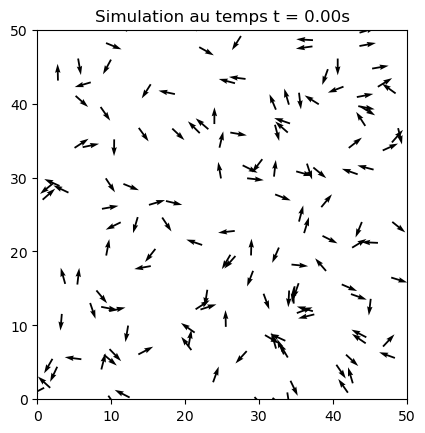

In [ ]:
fig, ax = visualisation.plot_simulation(df, 0, 50)
# fig.savefig('data/simulation_t_0.png')

## 4. Average behaviour of the flock

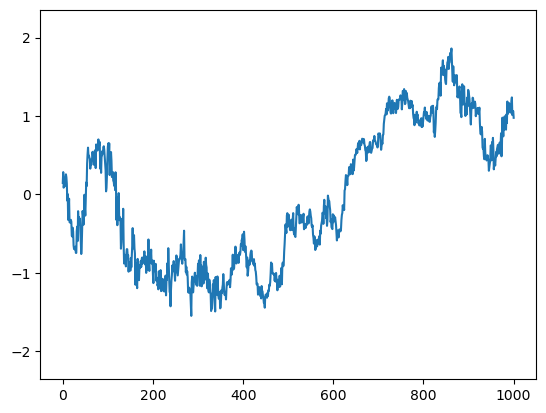

In [ ]:
angle_mean = utils.average_orientation(df)
plt.plot(angle_mean)
plt.ylim(-0.75*np.pi, 0.75*np.pi)
plt.show()

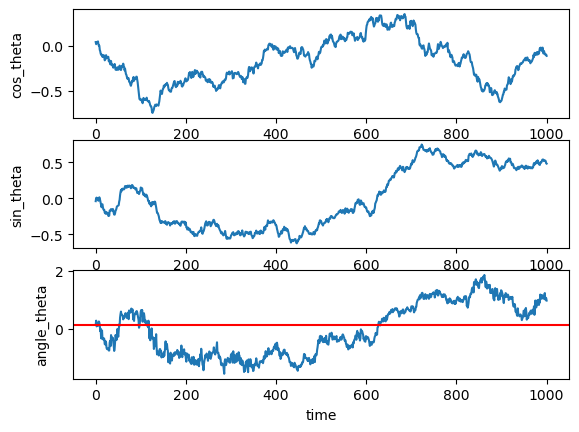

In [ ]:
fig, axs = visualisation.plot_average_orientation(df)
fig.savefig('data/average_orientation.png')

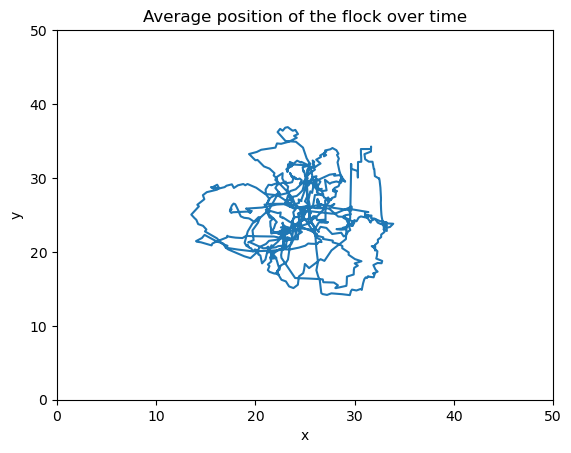

In [ ]:
# def plot_average_position(df, L=50):
#     # Compute the average position of the flock over time.
#     df_pos = utils.extract_positions_from_dataframe(df)
#     x = df_pos.filter(like="x").to_numpy()
#     y = df_pos.filter(like="y").to_numpy()
#     x_mean = np.mean(x, axis=1)
#     y_mean = np.mean(y, axis=1)

#     # Plot the average position of the flock over time.
#     fig, ax = plt.subplots()
#     ax.plot(x_mean, y_mean)
#     ax.set_title('Average position of the flock over time')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_xlim(0, L)
#     ax.set_ylim(0, L)
#     plt.show()

#     return fig, ax

fig, ax = visualisation.plot_average_position(df)
fig.savefig('data/average_position.png')


## 5. Order factor and other coefficients 

In [ ]:
# TESTS 
utils.order_factor(df)
print(utils.stationnary_order_factor(df), "Stationnary Order Factor")


0.48866238658309624 Stationnary Order Factor


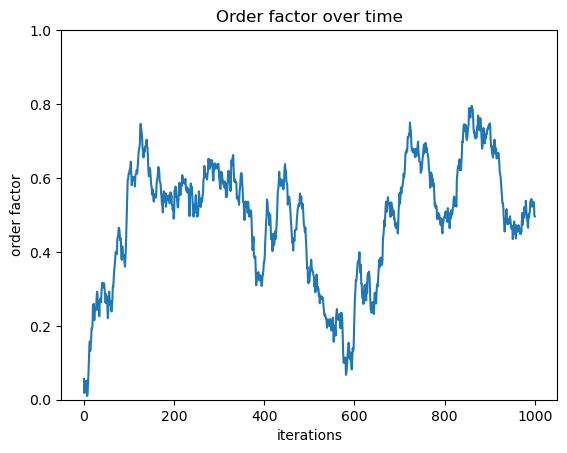

In [ ]:

# def plot_order_factor(df):
#     order = utils.order_factor(df)
#     fig, ax = plt.subplots()
#     ax.plot(order)
#     plt.title('Order factor over time')
#     plt.xlabel('iterations')
#     plt.ylabel('order factor')
#     plt.ylim(0, 1)
#     plt.show()

#     return fig, ax

    

fig, ax = visualisation.plot_order_factor(df)
fig.savefig('data/order_factor.png')



In [ ]:
from scipy import integrate
from numba import jit

In [ ]:
def binder_cumulant(df):
    tmax = df['t'].iloc[-1]
    order = utils.order_factor(df)
    x = np.linspace(0, tmax, len(order))
    phi2 = integrate.simpson(order*order, x=x) 
    phi4 = integrate.simpson(order**4, x=x)
    return 1 - phi4 / (3 * phi2**2)


In [ ]:
# N = 50
# noise = np.linspace(0., np.pi, N)
# binder_data = []
# stat_order_data = []
# for noise_amplitude in noise : 
#     print(noise_amplitude)
#     simulator = vicsek.Vicsek(domainSize=(L, L), radius=radius, noiseAmplitude=noise_amplitude)
#     # Simulate the Vicsek model.
#     simulationData = simulator.simulate()
#     df = utils.simulationDataToDataframe(simulationData)
#     binder = binder_cumulant(df)
#     binder_data.append(binder)
#     stat_order_data.append(utils.stationnary_order_factor(df))


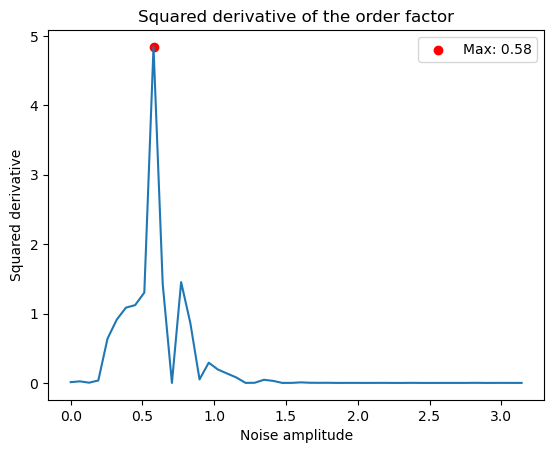

In [ ]:
# derivative of the order factor
deriv = np.gradient(stat_order_data, noise)
fig, ax = plt.subplots()
plt.plot(noise, deriv*deriv)
# point at max
max_idx = np.argmax(deriv*deriv)
plt.scatter(noise[max_idx], deriv[max_idx]*deriv[max_idx], c = 'red', label=f'Max: {noise[max_idx]:.2f}')
plt.title('Squared derivative of the order factor')
plt.xlabel('Noise amplitude')
plt.ylabel('Squared derivative')
plt.legend()
plt.show()
fig.savefig('data/derivative_order_factor.png')


We can see that there is a critical point, which shows a change in the order of the system. 

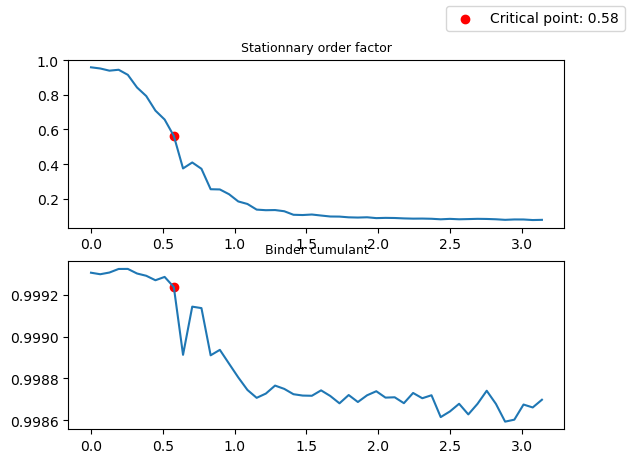

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(noise, stat_order_data)
axs[0].scatter(noise[max_idx], stat_order_data[max_idx], c = 'red', label=f'Critical point: {noise[max_idx]:.2f}')
axs[1].plot(noise, binder_data)
axs[1].scatter(noise[max_idx], binder_data[max_idx], c = 'red')
axs[0].set_title('Stationnary order factor', fontsize=9)
axs[1].set_title('Binder cumulant', fontsize=9)
fig.legend()
plt.show()

fig.savefig('data/binder_cumulant_crit.png')

In [ ]:
# store in csv 
binder_df = pd.DataFrame({'noise': noise, 'binder': binder_data, 'stationnary_order': stat_order_data, 'derivative': deriv})
binder_df.to_csv('data/binder.csv', index=False)

## Ploting clusters, cluster analysis 

In [ ]:
import time
import warnings
from itertools import cycle, islice

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

### DBSCAN on the different dataframes 

In [ ]:
### TESTS
pos_labels = utils.naive_clustering_labels_positions(df, -1)
orient_labels = utils.naive_clustering_labels_orientations(df, -1)
all_labels = utils.naive_clustering_labels_positions_and_orientations(df, -1)

for label in [pos_labels, orient_labels, all_labels]:
    print(utils.clustering_labels_stats(label))


(7, 15)
(1, 5)
(7, 103)


### Plotting clusters

In [ ]:
# def coloring_clusters(labels, cmap_name='rainbow'):
#     n = len(set(labels))
#     cmap = plt.get_cmap(cmap_name)
#     colors = cmap(labels+1 / max(labels+1))
#     return pd.DataFrame(colors)

### TESTS
labels = utils.naive_clustering_labels_positions(df, -1)
utils.coloring_clusters(labels).head()

,0,1,2,3
0,0.217647,4.291206e-01,9.755120e-01,1.0
1,0.217647,4.291206e-01,9.755120e-01,1.0
2,0.217647,4.291206e-01,9.755120e-01,1.0
3,0.217647,4.291206e-01,9.755120e-01,1.0
4,1.000000,1.224647e-16,6.123234e-17,1.0


Number of clusters: 3, Number of noise points: 11, Total : 150


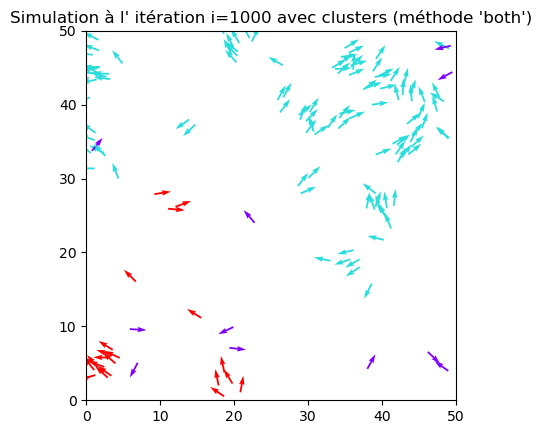

In [ ]:
fig, ax = visualisation.plot_clusters(df, 1000, method='both', eps=1, min_samples=3)
# fig.savefig('data/clusters.png')



c:\Users\nicos\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


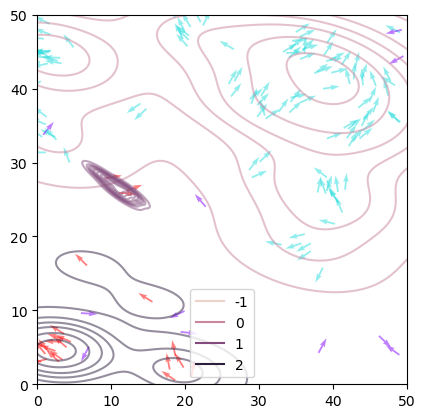

In [ ]:
fig, ax = visualisation.plot_clusters_kde(df, 1000, method='both', eps=1, min_samples=3)
fig.savefig('data/clusters_kde.png')

### Less naive clustering - periodic conditions

In [ ]:
from sklearn.preprocessing import StandardScaler
from numba import jit
import sklearn.cluster as skcl
from sklearn.neighbors import NearestNeighbors


In [ ]:
# @jit(nopython=True)
# def distance_periodic_scaled(X, Y, periods):
#     dims = periods.shape[0]
#     n = X.shape[0]
#     dist = 0 
#     for d in range(dims):
#         dist += (np.abs(X[d] - Y[d]) / periods[d])**2
#     return np.sqrt(dist)

# @jit(nopython=True)
# def distance_periodic(X, Y, periods):
#     dims = periods.shape[0]
#     n = X.shape[0]
#     dist = 0 
#     for d in range(dims):
#         dist += (np.abs(X[d] - Y[d]))**2
#     return np.sqrt(dist)

In [ ]:
# def neighbours_heuristic(X, periods, n_neighbours, quantile = 0.95, plot = False, metric_func = utils.distance_periodic):
#     neighbours = NearestNeighbors(n_neighbors=10, metric=metric_func, metric_params={'periods': periods})
#     neighbours.fit(X)
#     dist, index = neighbours.kneighbors(X)
#     distances = np.sort(dist[:, -1])
#     eps = distances[int(quantile * len(distances))]
#     if plot:
#         plt.plot(distances)
#         plt.title('K-distance Graph')
#         plt.xlabel('Points')
#         plt.ylabel('Distance')
#         plt.title(f'K-distance Graph - eps = {eps : .3f}')
#         plt.show()
#     return eps

In [ ]:
def clustering_periodic_labels(X, periods, n_neighbours, quantile = 0.95, plotBool = False, metric_func = utils.distance_periodic_scaled, eps=0.1):
    # eps = utils.neighbours_heuristic(X, periods, n_neighbours, quantile, plotBool, metric_func)

    db = skcl.dbscan(X, metric=metric_func, eps=eps, min_samples=n_neighbours, metric_params={'periods': periods})
    return db[1]

(4, 109)
{0, 1, 2, 3, -1}
Number of clusters: 4, Number of noise points: 109, Total : 150


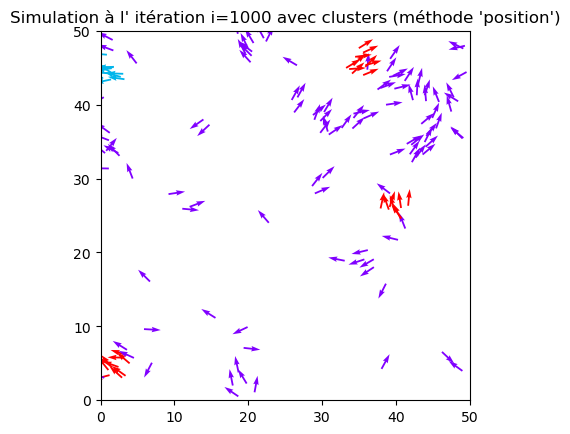

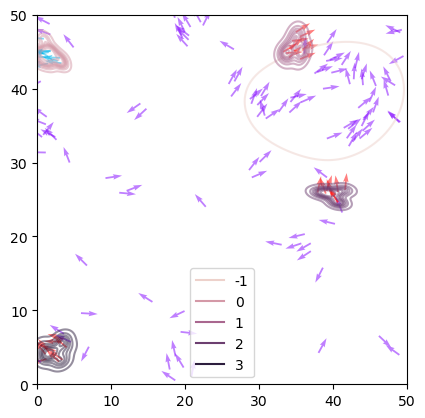

In [ ]:
df_all = utils.get_positions(df,1000)
L = 50
cluster_labels = clustering_periodic_labels(df_all, np.array([L, L]),n_neighbours=8, eps=radius/L)
print(utils.clustering_labels_stats(cluster_labels))
print(set(cluster_labels))
fig, ax = visualisation.plot_clusters(df, 1000, custom_labels=cluster_labels)
plt.show()
fig, ax = visualisation.plot_clusters_kde(df, 1000, custom_labels=cluster_labels)
plt.show()